# Stock Correlations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp500_stocks = pd.read_csv('./data/sp500_data.csv')
sp500_sectors = pd.read_csv('./data/sp500_sectors.csv')

In [3]:
sp500_stocks.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [4]:
sp500_sectors.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [5]:
sp500_stocks.rename(columns={'Unnamed: 0': "date"}, inplace=True)
sp500_stocks = sp500_stocks.set_index('date')


In [6]:
sp500_stocks.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [7]:
sp500_sectors.set_index('symbol', inplace=True)

,sector,sector_label,sub_sector
symbol,,,
ADS,information_technology,Technology,data_processing_&_outsourced_services
CA,information_technology,Technology,systems_software
MSFT,information_technology,Technology,systems_software
RHT,information_technology,Technology,systems_software
CTSH,information_technology,Technology,it_consulting_&_services
...,...,...,...
CELG,health_care,Health Care,biotechnology
GILD,health_care,Health Care,biotechnology
REGN,health_care,Health Care,biotechnology


### Creating One Giant Table


In [8]:
# This was dependent on the shape of the data
# The stocks dataframe had the same number of columns as rows on the sector dataframe
# This was because they corresponded to unique stock symbols
sp500_df = pd.concat([sp500_sectors, sp500_stocks.transpose()], axis=1)

In [9]:
sp500_df.head()

,sector,sector_label,sub_sector,1993-01-29,1993-02-01,1993-02-02,1993-02-03,1993-02-04,1993-02-05,1993-02-08,...,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01
symbol,,,,,,,,,,,,,,,,,,,,,
ADS,information_technology,Technology,data_processing_&_outsourced_services,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.419983,2.089996,1.540009,-2.080017,-0.809997,0.019989,-1.299988,-10.299988,-2.109986,-1.210022
CA,information_technology,Technology,systems_software,0.060124,-0.180389,-0.120257,0.060124,-0.360770,0.030058,0.030066,...,0.280001,-0.130001,0.440001,0.040001,-0.160000,-0.529999,-0.330000,-0.410000,-0.049999,0.020000
MSFT,information_technology,Technology,systems_software,-0.022100,0.027621,0.035900,-0.024857,-0.060757,0.093892,-0.060750,...,0.500000,-0.690003,-0.100002,-0.220001,-0.029999,-0.379997,-0.390004,-0.670002,-0.559997,-0.009998
RHT,information_technology,Technology,systems_software,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.279999,-0.099999,-0.309998,-0.159996,-0.940002,0.080002,-1.820000,-1.250000,-0.099999,0.869995
CTSH,information_technology,Technology,it_consulting_&_services,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.880001,-0.699997,0.250000,0.080002,-0.210000,0.350003,0.190003,-1.919998,-0.689999,0.329998


## Correlations

In [10]:
sp500_df['sector_label'].unique()

array(['Technology', 'Industrials', 'Energy', 'Consumer\nDiscretionary',
       'Utilities', 'Materials', 'EFTs', 'Telecom', 'Consumer\nStaples',
       'Financials', 'Health Care'], dtype=object)

In [11]:
sp500_tech = sp500_df[sp500_df['sector_label'] == 'Technology']
sp500_health = sp500_df[sp500_df['sector_label'] == 'Health Care']

In [12]:
sp500_tech.head()

,sector,sector_label,sub_sector,1993-01-29,1993-02-01,1993-02-02,1993-02-03,1993-02-04,1993-02-05,1993-02-08,...,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01
symbol,,,,,,,,,,,,,,,,,,,,,
ADS,information_technology,Technology,data_processing_&_outsourced_services,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.419983,2.089996,1.540009,-2.080017,-0.809997,0.019989,-1.299988,-10.299988,-2.109986,-1.210022
CA,information_technology,Technology,systems_software,0.060124,-0.180389,-0.120257,0.060124,-0.360770,0.030058,0.030066,...,0.280001,-0.130001,0.440001,0.040001,-0.160000,-0.529999,-0.330000,-0.410000,-0.049999,0.020000
MSFT,information_technology,Technology,systems_software,-0.022100,0.027621,0.035900,-0.024857,-0.060757,0.093892,-0.060750,...,0.500000,-0.690003,-0.100002,-0.220001,-0.029999,-0.379997,-0.390004,-0.670002,-0.559997,-0.009998
RHT,information_technology,Technology,systems_software,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.279999,-0.099999,-0.309998,-0.159996,-0.940002,0.080002,-1.820000,-1.250000,-0.099999,0.869995
CTSH,information_technology,Technology,it_consulting_&_services,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.880001,-0.699997,0.250000,0.080002,-0.210000,0.350003,0.190003,-1.919998,-0.689999,0.329998


In [13]:
sp500_health.head()

,sector,sector_label,sub_sector,1993-01-29,1993-02-01,1993-02-02,1993-02-03,1993-02-04,1993-02-05,1993-02-08,...,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01
symbol,,,,,,,,,,,,,,,,,,,,,
DVA,health_care,Health Care,health_care_facilities,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,-1.200005,-0.540001,-1.360001,0.340004,0.099999,-0.599998,-0.500000,-0.639999
HCA,health_care,Health Care,health_care_facilities,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.440003,0.690003,-0.150002,-0.730003,-0.629997,6.700004,-0.600006,-0.409996,-0.860001,-0.329994
LH,health_care,Health Care,health_care_facilities,0.0,1.522121,-0.608848,-0.608848,-0.304424,-0.913272,-0.608848,...,-0.240005,0.379997,-1.419998,-0.809997,-1.070000,1.889999,0.320000,-1.320000,1.010002,0.550003
DGX,health_care,Health Care,health_care_facilities,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.119367,0.566984,-1.482122,0.437666,-0.407835,0.855451,-0.169099,-0.994710,0.626665,-0.099469
THC,health_care,Health Care,health_care_facilities,0.0,-0.321478,-0.321478,0.321478,0.000000,-0.321478,0.000000,...,0.070000,0.540001,-0.759998,-0.780003,-1.519996,5.879997,0.479999,-0.320000,0.130001,0.070000


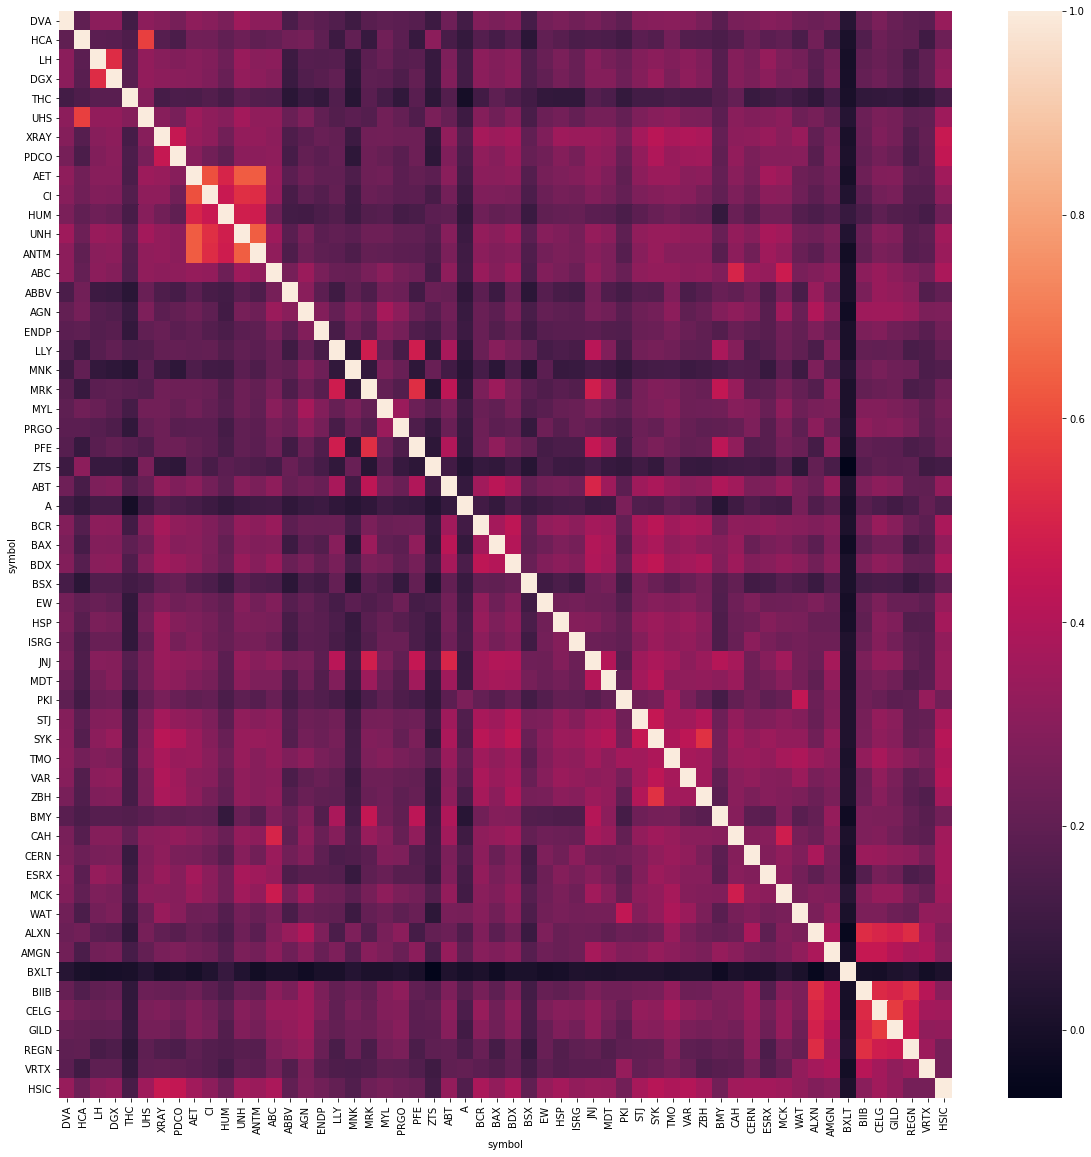

In [14]:
#56 entries
health_corr_matrix = sp500_health.transpose().iloc[3:].astype(float).corr()
plt.figure(figsize=(20,20))
sns.heatmap(health_corr_matrix)
